In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. 

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df_train = pd.read_csv('adult.data', header = None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
df_train.columns = col_labels
df_train.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
nr_train = df_train.shape[0]
nr_train

32561

In [5]:
df_test = pd.read_csv('adult.test', skiprows=1, header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
df_test.columns = col_labels
df_test.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
nr_test = df_test.shape[0]
nr_test

16281

In [8]:
df = pd.concat([df_train, df_test], axis=0)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Looking at unique values of each column / Searching for strange values

In [11]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
df["workclass"].replace(" ?", df["workclass"].mode()[0], inplace=True)

In [13]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
df["occupation"].replace(" ?", df["occupation"].mode()[0] , inplace=True)

In [15]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
df["native_country"].replace(" ?", df["native_country"].mode()[0], inplace=True)

In [17]:
# If we have cells or column names with spaces in between we should replace them with underscore if we want to draw a tree.
# We have blank space as first character in each categorical feature so we are removing this blank space
df.replace(" ", "", regex=True, inplace=True)

In [18]:
# There are no missing values
df.isna().sum().values.any()

False

In [19]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [20]:
# Check if features that have object datatype (categorical featuress) are in string format because they may have int,float and string values.
# Check that each column has the right datatype, if not convert to the right datatype
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [21]:
X = df.drop("wage_class", axis=1).copy()
y = df["wage_class"].copy()

In [22]:
X = pd.get_dummies(X, columns=["workclass", "education", "marital_status", "occupation", "relationship",
                                          "race", "sex", "native_country"])
                        

In [23]:
# y must have only 0 and 1.
y.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [24]:
y.value_counts()
# 1 is the minority class, 0 is the majority class

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: wage_class, dtype: int64

In [25]:
def fun(x):
    if x == "<=50K" or x == "<=50K.":
        return 0
    elif x == ">50K" or x == ">50K.":
        return 1
    
y = y.apply(fun)
y

0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 48842, dtype: int64

In [26]:
x_train = X[:nr_train]
y_train = y[:nr_train]
x_test = X[nr_train : len(df)]
y_test = y[nr_train : len(df)]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32561, 105)
(32561,)
(16281, 105)
(16281,)


In [27]:
model = XGBClassifier(objective="binary:logistic", random_state=1)
model.fit(x_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric="aucpr", eval_set=[(x_test, y_test)])

# missing -> we tell XGBoost what character is used to represent missing values
# in general we use 0 as missing values because XGBoost does not allocate memory for zeros and we set missing=None
# early_stopping_rounds=10 -> if after building 10 trees the predictions dont improve, it will stop and will take the prediction of tree nr_trees - 10


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.75972
[1]	validation_0-aucpr:0.77599
[2]	validation_0-aucpr:0.78200
[3]	validation_0-aucpr:0.78995
[4]	validation_0-aucpr:0.79325
[5]	validation_0-aucpr:0.79667
[6]	validation_0-aucpr:0.79924
[7]	validation_0-aucpr:0.80064
[8]	validation_0-aucpr:0.80241
[9]	validation_0-aucpr:0.80357
[10]	validation_0-aucpr:0.80470
[11]	validation_0-aucpr:0.80589
[12]	validation_0-aucpr:0.80674
[13]	validation_0-aucpr:0.80710
[14]	validation_0-aucpr:0.80752
[15]	validation_0-aucpr:0.80811
[16]	validation_0-aucpr:0.80849
[17]	validation_0-aucpr:0.81277
[18]	validation_0-aucpr:0.81377
[19]	validation_0-aucpr:0.81562
[20]	validation_0-aucpr:0.81573
[21]	validation_0-aucpr:0.81814
[22]	validation_0-aucpr:0.81851
[23]	validation_0-aucpr:0.82039
[24]	validation_0-aucpr:0.82081
[25]	validation_0-aucpr:0.82099
[26]	validation_0-aucpr:0.82211
[27]	validation_0-aucpr:0.82215
[28]	validation_0-aucpr:0.82317
[29]	validation_0-aucpr:0.82384
[30]	validation_0-aucpr:0.82363
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
# Model Accuracy on TRAINING SET
pred_train = model.predict(x_train)
#pred_train = [round(x) for x in pred_train]
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     24720
           1       0.82      0.69      0.75      7841

    accuracy                           0.89     32561
   macro avg       0.86      0.82      0.84     32561
weighted avg       0.88      0.89      0.88     32561



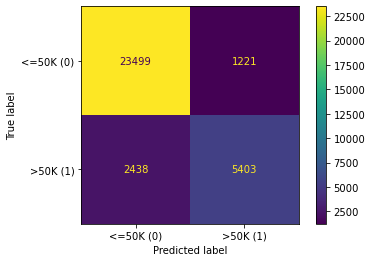

In [29]:
plot_confusion_matrix(model, x_train, y_train, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [30]:
recall_0 = (23649) / (23649 + 1071)  # RECALL (0)
precision_0 = (23649) / (23649 + 2150)   # PRECISION (0)

recall_1 = (5691) / (2150 + 5691)   # RECALL (1)
precision_1 = (5691) / (1071 + 5691)   # PRECISION (1)

print("RECALL (0) : ", recall_0)
print("PRECISION (0) : ", precision_0)

print("RECALL (1) : ", recall_1)
print("PRECISION (1) : ", precision_1)

RECALL (0) :  0.9566747572815534
PRECISION (0) :  0.9166634365673089
RECALL (1) :  0.7258002805764571
PRECISION (1) :  0.8416149068322981


In [31]:
# Model Accuracy on TEST SET
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.78      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.80      0.82     16281
weighted avg       0.87      0.87      0.87     16281



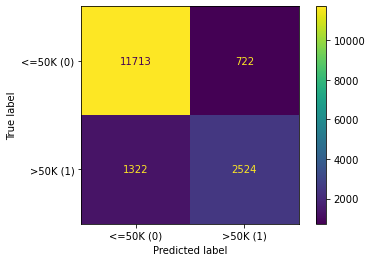

In [32]:
plot_confusion_matrix(model, x_test, y_test, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

 GridSearch with Cross Validation <br>
 We are going to have 2 rounds in order to prevent the long time it needs to find the best parameters and to get a better performance of our model. In 1.Round we set some parameters. Based on these parameters we set another parameters on 2.Round

In [33]:
# 1.Round
params = {"max_depth" : [3, 4, 5],
          "learning_rate" : [0.1, 0.01, 0.05],
          "gamma" : [0, 0.25, 1.0],
          "reg_lambda" : [0, 1.0, 10.0],
          "scale_pos_weight" : [1, 3, 5]}

In [ ]:
gridsearch = GridSearchCV(estimator=XGBClassifier(objective="binary:logistic", 
                                                  random_state=1, 
                                                  subsample=0.9, 
                                                  colsample_bytree=0.5), 
                          param_grid = params, scoring='roc_auc', verbose=0, n_jobs=10, cv=5)

gridsearch.fit(x_train, y_train, verbose=False, early_stopping_rounds=10, eval_metric="auc", eval_set=[(x_test, y_test)])

In [70]:
print(gridsearch.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}


* Since best learning rate is 0.1 (upper bound) we will try higher values to get the best learning rate.
* Since gamma is 1.0 (upper bound) we will try higher values to get the best gamma
* Since max_depth is 5 (upper bound) we will try higher values to get the best max_depth
* Since reg_lambda is 0 (lower bound) we are not going to try new values of it.
* Since scale_pos_weight is 3 (middle value) we are not going to try new values of it.


In [71]:
# 2.Round

params = {"max_depth" : [5, 6, 7],
          "learning_rate" : [0.1, 0.2, 0.3],
          "gamma" : [1.0, 1.1, 1.1],
          "reg_lambda" : [0],
          "scale_pos_weight" : [3]}


In [72]:
gridsearch = GridSearchCV(estimator=XGBClassifier(objective="binary:logistic", 
                                                  random_state=1, 
                                                  subsample=0.9, 
                                                  colsample_bytree=0.5), 
                          param_grid = params, scoring='roc_auc', verbose=0, n_jobs=10, cv=5)

gridsearch.fit(x_train, y_train, verbose=False, early_stopping_rounds=10, eval_metric="auc", eval_set=[(x_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, vali

In [73]:
print(gridsearch.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 3}


In [99]:
model = XGBClassifier(objective="binary:logistic", 
                      random_state=1,
                      gamma = 1.0,
                      learning_rate = 0.1,
                      max_depth = 7, 
                      reg_lambda = 0,
                      scale_pos_weight = 3,
                      subsample=0.9,
                      colsample_bytree = 0.5)

model.fit(x_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric="aucpr", eval_set=[(x_test, y_test)])

[0]	validation_0-aucpr:0.76395
[1]	validation_0-aucpr:0.77238
[2]	validation_0-aucpr:0.78036
[3]	validation_0-aucpr:0.78567
[4]	validation_0-aucpr:0.78823
[5]	validation_0-aucpr:0.79228
[6]	validation_0-aucpr:0.79157
[7]	validation_0-aucpr:0.79315
[8]	validation_0-aucpr:0.79337
[9]	validation_0-aucpr:0.79636
[10]	validation_0-aucpr:0.79624
[11]	validation_0-aucpr:0.79918
[12]	validation_0-aucpr:0.80156
[13]	validation_0-aucpr:0.80199
[14]	validation_0-aucpr:0.80208
[15]	validation_0-aucpr:0.80323
[16]	validation_0-aucpr:0.80477
[17]	validation_0-aucpr:0.80482
[18]	validation_0-aucpr:0.80608
[19]	validation_0-aucpr:0.80540
[20]	validation_0-aucpr:0.80679
[21]	validation_0-aucpr:0.80815
[22]	validation_0-aucpr:0.80886
[23]	validation_0-aucpr:0.80837
[24]	validation_0-aucpr:0.80955
[25]	validation_0-aucpr:0.81038
[26]	validation_0-aucpr:0.81123
[27]	validation_0-aucpr:0.81169
[28]	validation_0-aucpr:0.81211
[29]	validation_0-aucpr:0.81282
[30]	validation_0-aucpr:0.81370
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
# Model Accuracy on TRAINING SET
pred_train = model.predict(x_train)
#pred_train = [round(x) for x in pred_train]
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     24720
           1       0.64      0.90      0.75      7841

    accuracy                           0.86     32561
   macro avg       0.80      0.87      0.82     32561
weighted avg       0.89      0.86      0.86     32561



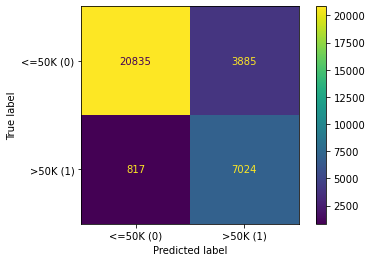

In [101]:
plot_confusion_matrix(model, x_train, y_train, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [102]:
# Model Accuracy on TEST SET
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89     12435
           1       0.61      0.85      0.71      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.84      0.80     16281
weighted avg       0.87      0.84      0.85     16281



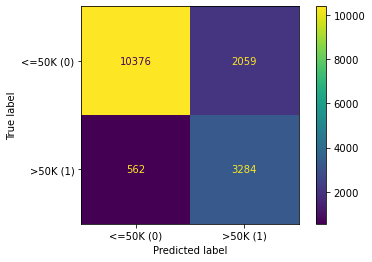

In [103]:
plot_confusion_matrix(model, x_test, y_test, values_format="d", display_labels=["<=50K (0)", ">50K (1)"])

In [ ]:
import pickle
f1 = open("xgboost.pickle", "wb")
pickle.dump(model, f1)